In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import math

#Ej 1

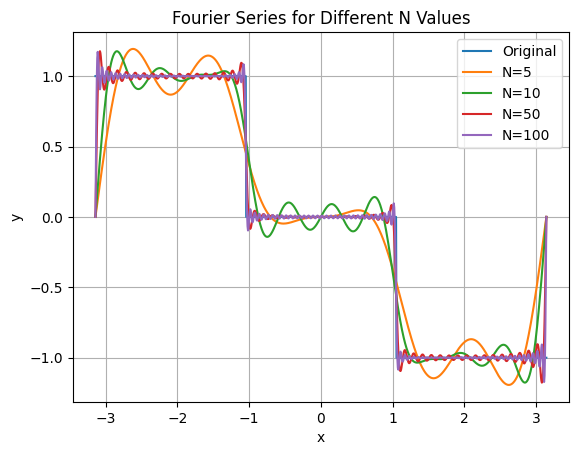

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def trapezoidal_rule(func, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    fx = func(x)
    integral = 0.5 * (fx[0] + fx[-1]) + np.sum(fx[1:-1])
    integral *= h
    return integral

def fourier_coefficient(func, n):
    a = -np.pi
    b = np.pi

    a0 = trapezoidal_rule(func, a, b, 1000)

    integrand_a = lambda x: func(x) * np.cos(n * x)
    integral_a = trapezoidal_rule(integrand_a, a, b, 1000)

    integrand_b = lambda x: func(x) * np.sin(n * x)
    integral_b = trapezoidal_rule(integrand_b, a, b, 1000)
    return (integral_a / np.pi), (integral_b / np.pi), a0

def fourier_series(a0, an, bn, x_values):
    series = (a0 / (2*np.pi)) * np.ones_like(x_values)
    for n, (a_n, b_n) in enumerate(zip(an, bn), start=1):
        series += a_n * np.cos(n * x_values) + b_n * np.sin(n * x_values)
    return series

def calculate_series_values(func, N, x_values):
    an = []
    bn = []
    a0 = 0
    for n in range(1, N + 1):
        a_n, b_n, a0 = fourier_coefficient(func, n)
        an.append(a_n)
        bn.append(b_n)
    series_values = fourier_series(a0, an, bn, x_values)
    return series_values

def square_wave(x):
    x = np.asarray(x)
    result = np.zeros_like(x)
    result[(x >= -np.pi) & (x < -np.pi/3)] = 1
    result[(x > np.pi/3) & (x <= np.pi)] = -1
    return result

x_values = np.linspace(-np.pi, np.pi, 1000)
plt.plot(x_values, square_wave(x_values), label='Original')

N_values = [5, 10, 50, 100]

for N in N_values:
    series_values = calculate_series_values(square_wave, N, x_values)
    plt.plot(x_values, series_values, label=f'N={N}')

plt.title('Fourier Series for Different N Values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


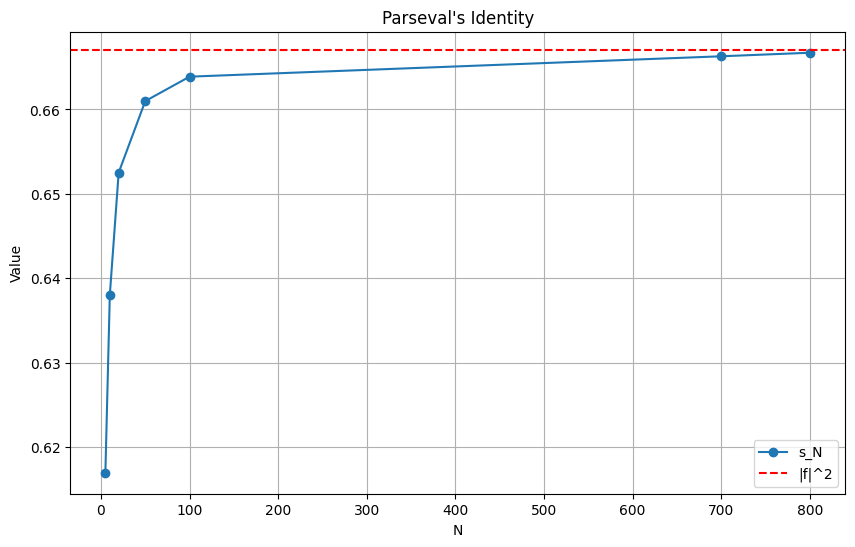

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def square_wave(x):
    x = np.asarray(x)
    result = np.zeros_like(x)
    result[(x >= -np.pi) & (x < -np.pi/3)] = 1
    result[(x > np.pi/3) & (x <= np.pi)] = -1
    return result


def fourier_coefficient(func, n):
    a = -np.pi
    b = np.pi

    a0 = trapezoidal_rule(func, a, b, 1000) / (2 * np.pi)

    integrand_a = lambda x: func(x) * np.cos(n * x)
    integral_a = trapezoidal_rule(integrand_a, a, b, 1000) / np.pi

    integrand_b = lambda x: func(x) * np.sin(n * x)
    integral_b = trapezoidal_rule(integrand_b, a, b, 1000) / np.pi
    return a0, integral_a, integral_b


norm_f_squared = trapezoidal_rule(lambda x: square_wave(x) ** 2, -np.pi, np.pi, 1000) / (2 * np.pi)

def compute_parseval(N_values):
    a0 = trapezoidal_rule(square_wave, -np.pi, np.pi, 1000) / (2 * np.pi)
    s_N_list = []

    for N in N_values:
        coefficients_squared_sum = a0 ** 2
        for n in range(1, N + 1):
            _, a_n, b_n = fourier_coefficient(square_wave, n)
            coefficients_squared_sum += 0.5 * (a_n ** 2 + b_n ** 2)
        s_N_list.append(coefficients_squared_sum)

    return s_N_list


N_values = [5, 10, 20, 50, 100,700, 800]
s_N_list = compute_parseval(N_values)


plt.figure(figsize=(10, 6))
plt.plot(N_values, s_N_list, marker='o', linestyle='-', label='s_N')
plt.axhline(y=norm_f_squared, color='r', linestyle='--', label='|f|^2')
plt.xlabel('N')
plt.ylabel('Valor')
plt.title('Identidad de Parseval')
plt.legend()
plt.grid(True)
plt.show()



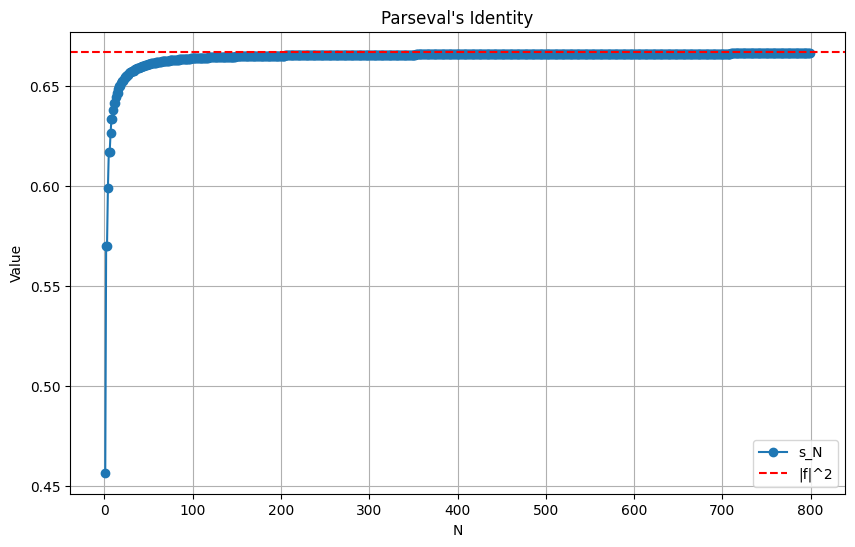

In [171]:
import numpy as np
import matplotlib.pyplot as plt

def square_wave(x):
    x = np.asarray(x)
    result = np.zeros_like(x)
    result[(x >= -np.pi) & (x < -np.pi/3)] = 1
    result[(x > np.pi/3) & (x <= np.pi)] = -1
    return result

def fourier_coefficient(func, n):
    a = -np.pi
    b = np.pi

    a0 = trapezoidal_rule(func, a, b, 1000) / (2 * np.pi)

    integrand_a = lambda x: func(x) * np.cos(n * x)
    integral_a = trapezoidal_rule(integrand_a, a, b, 1000) / np.pi

    integrand_b = lambda x: func(x) * np.sin(n * x)
    integral_b = trapezoidal_rule(integrand_b, a, b, 1000) / np.pi
    return a0, integral_a, integral_b


norm_f_squared = trapezoidal_rule(lambda x: square_wave(x) ** 2, -np.pi, np.pi, 1000) / (2 * np.pi)

def compute_parseval(N_values):
    a0 = trapezoidal_rule(square_wave, -np.pi, np.pi, 1000) / (2 * np.pi)
    s_N_list = []

    for N in N_values:
        coefficients_squared_sum = a0 ** 2
        for n in range(1, N + 1):
            _, a_n, b_n = fourier_coefficient(square_wave, n)
            coefficients_squared_sum += 0.5 * (a_n ** 2 + b_n ** 2)
        s_N_list.append(coefficients_squared_sum)

    return s_N_list


N_values = range(1, 800)
s_N_list = compute_parseval(N_values)


plt.figure(figsize=(10, 6))
plt.plot(N_values, s_N_list, marker='o', linestyle='-', label='s_N')
plt.axhline(y=norm_f_squared, color='r', linestyle='--', label='|f|^2')
plt.xlabel('N')
plt.ylabel('Valor')
plt.title('Identidad de Parseval')
plt.legend()
plt.grid(True)
plt.show()


In [172]:

acceptable_N = []
min = 0
for i, s_N in enumerate(s_N_list):
    if abs(s_N - norm_f_squared) < 1e-3:
        acceptable_N.append(N_values[i])
        if min==0:
          min = N_values[i]

print("N para los que la diferencia entre s_N y|f|^2 menor 10^-3:", acceptable_N)
print("El minimo es", min, "N")


N para los que la diferencia entre s_N y|f|^2 menor 10^-3: [501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 

#Ejercicio 2

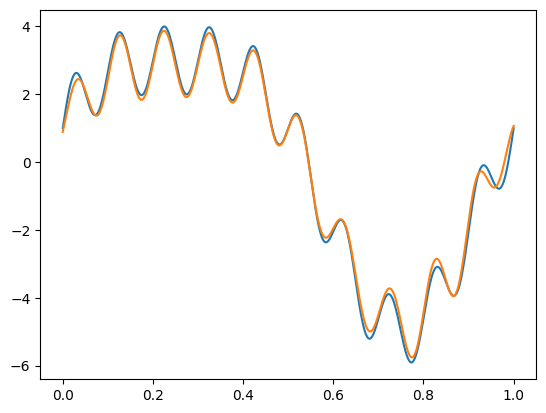

In [211]:
import numpy as np
import matplotlib.pyplot as plt

def reconstruction(x, tsampled, tsmooth, F):
    x_sinc = np.zeros(len(tsmooth))
    for n in range(0, len(tsampled)):
        x_sinc += x[n] * np.sinc(F * (tsmooth-n*tsampled[1]))
    return x_sinc

def y(t, f):
  return np.sin(2*np.pi*f*t)+np.cos(2*np.pi*f*t/5)+4*np.sin(2*np.pi*f*t/10)

f=10
tsampledO=np.linspace(0, 1, 25)
tsmoothO=np.linspace(0, 1, 800)
ysampledO=y(tsampledO, f)
ysmoothO=y(tsmoothO, f)
yreconstruidoO=reconstruction(ysampledO, tsampledO, tsmoothO, 25)
plt.plot(tsmoothO, ysmoothO)
plt.plot(tsmoothO, yreconstruidoO)


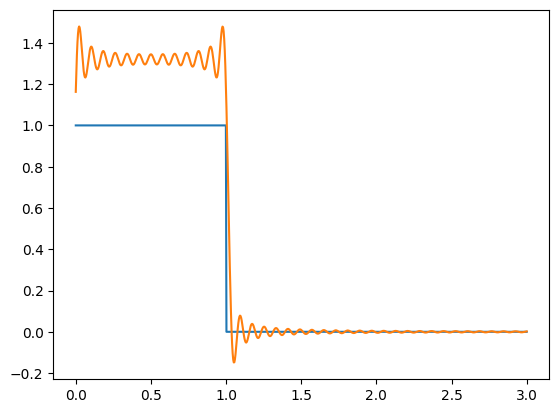

In [227]:
import numpy as np
import matplotlib.pyplot as plt

def reconstruction(x, tsampled1, tsmooth1, F):
    x_sinc = np.zeros(len(tsmooth1))
    for n in range(0, len(tsampled1)):
        x_sinc += x[n] * np.sinc(F * (tsmooth1-n*tsampled1[1]))
    return x_sinc

def fun1(t):
  return np.where(np.abs(t) <= 1, 1,0)



tsampled=np.linspace(0, 3, 100)

tsmooth=np.linspace(0, 3, 800)

ysampled=fun1(tsampled)
ysmooth=fun1(tsmooth)
yreconstruido=reconstruction(ysampled, tsampled, tsmooth, 25)
plt.plot(tsmooth, ysmooth)
plt.plot(tsmooth, yreconstruido)

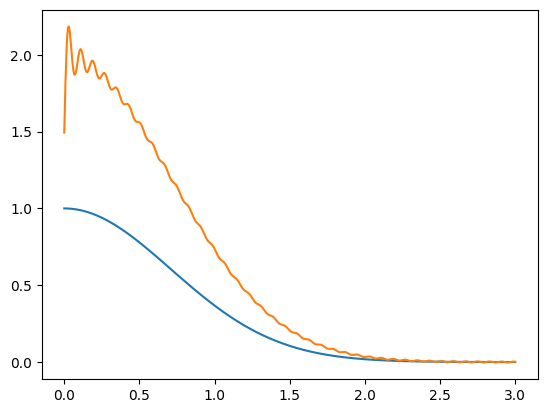

In [230]:
import numpy as np
import matplotlib.pyplot as plt

def reconstruction(x, tsampled1, tsmooth1, F):
    x_sinc = np.zeros(len(tsmooth1))
    for n in range(0, len(tsampled1)):
        x_sinc += x[n] * np.sinc(F * (tsmooth1-n*tsampled1[1]))
    return x_sinc

def fun2(t):
  return np.exp(-t ** 2)



tsampled=np.linspace(0, 3, 150)
tsmooth=np.linspace(0, 3, 800)
ysampled=fun2(tsampled)
ysmooth=fun2(tsmooth)
yreconstruido=reconstruction(ysampled, tsampled, tsmooth, 25)
plt.plot(tsmooth, ysmooth)
plt.plot(tsmooth, yreconstruido)

En los negativos no da bien, en 0 el algoritmo tiene problemas.
En el g da discontinuidades en un punto donde no hay discontinuidades (0) y en el f tambien
Ninguna es filedigna. Ambas se pegan mejor a la funcion original cuando se alejan del 0 y se planchan hacia el infinito.

#Ejercicio 3

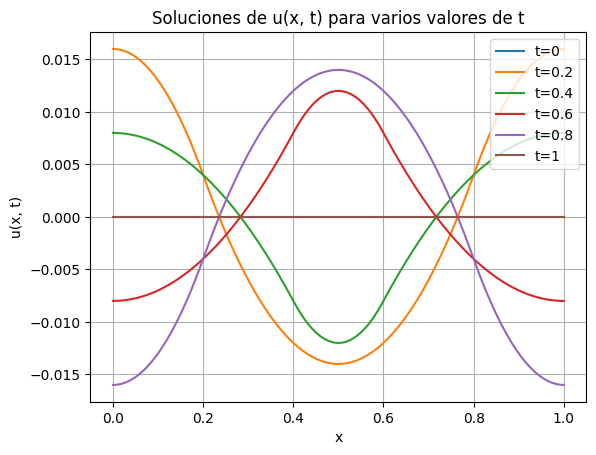

In [232]:
import numpy as np
import matplotlib.pyplot as plt


def u(x, t, N):
    result = 0
    for k in range(1, N+1):
        bk = 2 * ((-1)**k + 1) / (np.pi**3 * k**3)
        result += np.cos(k * np.pi * x) * bk * np.sin(k * np.pi * t)
    return result


x_values = np.linspace(0, 1, 1000)
t_values = [0, 0.2, 0.4, 0.6, 0.8, 1]


for t in t_values:
    plt.plot(x_values, u(x_values, t, N=100), label=f"t={t}")

plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.title('Soluciones de u(x, t) para varios valores de t')
plt.legend()
plt.grid(True)
plt.show()
